In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.impute import SimpleImputer

data_uni_2 = pd.read_csv("data_uni.csv")

data_uni_2.iloc[:, [24,25,29]]= data_uni_2.iloc[:, [24,25,29]].fillna(0)
column_miss= list(data_uni_2.columns[data_uni_2.isnull().any()])

# IMPUTER ===========================================================================

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_uni_2[column_miss]= imputer.fit_transform(data_uni_2[column_miss])

data_uni_2= data_uni_2.drop(["Course","AWM year 1", "AWM year 2", "AWM year 3", "Overall AWM", "Progression", "Attendance"], axis = 1)

# FORMATING MANUALLY ================================================================

#ethinicty binarisation 
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("White", "0")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Asian", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Black/Black British African", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Other ethnic background", "1")

# Polar 4 Score Binarisation
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(5, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(4, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(3, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(2, 1)

#splitting X and y ==================================================================
y = data_uni_2["desertion"]
X = data_uni_2.drop(["desertion"], axis = 1)

In [3]:
from pycaret.classification import *
classify = setup(data= data_uni_2, target = "desertion", log_experiment = True, log_plots= True, remove_multicollinearity= True, session_id=1434, multicollinearity_threshold=0.8, log_profile= True, fix_imbalance=True, feature_selection = False, normalize = False,  pca= False, pca_components=0.9, numeric_features=[ "First Sit", "Fails","No Submissions", "Late Submission", "Pass",  "Maths", "UCAS Points"])

,Description,Value
0,session_id,1434
1,Target,desertion
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1033, 29)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
compare_models(include=["rf", "ada","gbc",])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9253,0.9453,0.6909,0.8072,0.7411,0.6981,0.7031,0.3910
ada,Ada Boost Classifier,0.9225,0.9334,0.6864,0.8125,0.7257,0.6823,0.6958,0.0670
gbc,Gradient Boosting Classifier,0.9212,0.9488,0.7326,0.7698,0.7406,0.6948,0.7013,0.1130


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1434, verbose=0,
                       warm_start=False)

In [5]:
rf= create_model("rf", cross_validation= True)
rf_results = pull()
rf_scores = rf_results.loc[["Mean"]]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8630,0.9378,0.4167,0.6250,0.5000,0.4243,0.4360
1,0.9452,0.9788,0.7500,0.9000,0.8182,0.7862,0.7908
2,0.9589,0.9918,0.8333,0.9091,0.8696,0.8452,0.8464
3,0.9583,0.9590,0.8182,0.9000,0.8571,0.8328,0.8341
4,0.9583,0.9940,0.7273,1.0000,0.8421,0.8188,0.8326
5,0.8889,0.8711,0.5455,0.6667,0.6000,0.5362,0.5399
6,0.9167,0.9709,0.6364,0.7778,0.7000,0.6522,0.6566
7,0.9167,0.9061,0.6364,0.7778,0.7000,0.6522,0.6566
8,0.8889,0.8674,0.7273,0.6154,0.6667,0.6006,0.6036


In [6]:
rf_test= create_model("rf", cross_validation= False)
rf_test_results = pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9484,0.9556,0.7556,0.8718,0.8095,0.7798,0.7825


In [7]:
tuned_rf= tune_model(rf, optimize = "Recall")
tuned_rf_results = pull()
tuned_rf_scores = tuned_rf_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8219,0.9071,0.5833,0.4667,0.5185,0.4109,0.4148
1,0.8904,0.9686,0.8333,0.6250,0.7143,0.6482,0.6585
2,0.9315,0.9863,1.0000,0.7059,0.8276,0.7864,0.8050
3,0.9167,0.9225,0.8182,0.6923,0.7500,0.7004,0.7039
4,0.9444,0.9851,0.8182,0.8182,0.8182,0.7854,0.7854
5,0.8611,0.8942,0.6364,0.5385,0.5833,0.5007,0.5032
6,0.9444,0.9627,0.9091,0.7692,0.8333,0.8003,0.8043
7,0.8750,0.8778,0.6364,0.5833,0.6087,0.5345,0.5352
8,0.7778,0.8942,0.7273,0.3810,0.5000,0.3746,0.4070


In [8]:
final_rf = calibrate_model(tuned_rf)
final_rf_results= pull()
final_rf_scores = final_rf_results.loc[["Mean"]]



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8082,0.9085,0.5833,0.4375,0.5000,0.3843,0.3904
1,0.8904,0.9713,0.8333,0.6250,0.7143,0.6482,0.6585
2,0.9315,0.9863,1.0000,0.7059,0.8276,0.7864,0.8050
3,0.9167,0.9225,0.8182,0.6923,0.7500,0.7004,0.7039
4,0.9444,0.9866,0.8182,0.8182,0.8182,0.7854,0.7854
5,0.8611,0.8927,0.6364,0.5385,0.5833,0.5007,0.5032
6,0.9444,0.9613,0.9091,0.7692,0.8333,0.8003,0.8043
7,0.8750,0.8778,0.6364,0.5833,0.6087,0.5345,0.5352
8,0.7778,0.8934,0.7273,0.3810,0.5000,0.3746,0.4070


In [9]:
predict_model(final_rf)
result_pred_rf = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9161,0.9509,0.7778,0.6863,0.7292,0.6798,0.6816


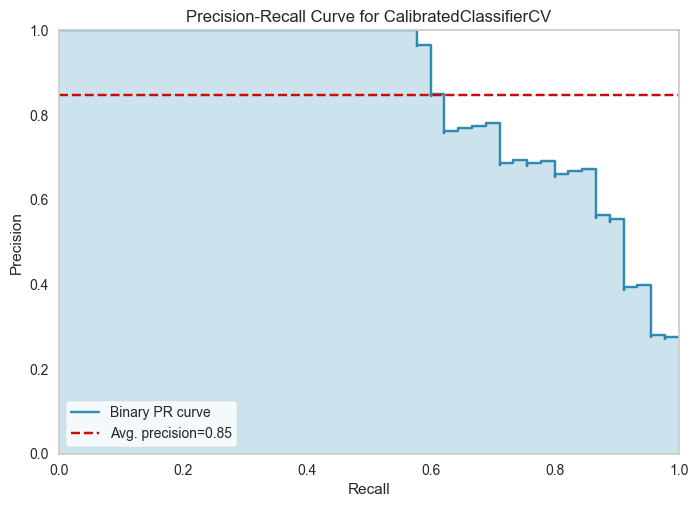

In [10]:
plot_model(final_rf, plot ="pr", plot_kwargs= {"fontsize":16})

In [11]:
evaluate_model(final_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
gbc_test = create_model("gbc",cross_validation= False)
gbc_test_results= pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9484,0.9574,0.8,0.8372,0.8182,0.7881,0.7884


In [13]:
gbc = create_model("gbc",cross_validation= True)
gbc_results= pull()
gbc_scores =gbc_results.loc[["Mean"]] 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8767,0.9522,0.6667,0.6154,0.6400,0.5658,0.5664
1,0.9452,0.9740,0.9167,0.7857,0.8462,0.8131,0.8166
2,0.9452,0.9904,0.8333,0.8333,0.8333,0.8005,0.8005
3,0.9444,0.9359,0.8182,0.8182,0.8182,0.7854,0.7854
4,0.9583,0.9970,0.7273,1.0000,0.8421,0.8188,0.8326
5,0.8889,0.8361,0.5455,0.6667,0.6000,0.5362,0.5399
6,0.9028,0.9642,0.4545,0.8333,0.5882,0.5385,0.5703
7,0.9167,0.9382,0.7273,0.7273,0.7273,0.6781,0.6781
8,0.8889,0.9225,0.8182,0.6000,0.6923,0.6265,0.6377


In [14]:
tuned_gbc= tune_model(gbc, optimize = "Recall")
tuned_gbc_results = pull()
tuned_gbc_scores = tuned_gbc_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8904,0.9413,0.6667,0.6667,0.6667,0.6011,0.6011
1,0.8767,0.9645,0.9167,0.5789,0.7097,0.6364,0.6635
2,0.9589,0.9863,1.0000,0.8000,0.8889,0.8641,0.8722
3,0.9306,0.9165,0.8182,0.7500,0.7826,0.7414,0.7424
4,0.9444,0.9836,0.8182,0.8182,0.8182,0.7854,0.7854
5,0.8194,0.8659,0.5455,0.4286,0.4800,0.3727,0.3766
6,0.8750,0.9374,0.5455,0.6000,0.5714,0.4985,0.4992
7,0.9306,0.9083,0.7273,0.8000,0.7619,0.7214,0.7225
8,0.8750,0.8823,0.8182,0.5625,0.6667,0.5930,0.6087


In [15]:
final_gbc = calibrate_model(tuned_gbc)
final_gbc_results= pull()
final_gbc_scores = final_gbc_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8904,0.9467,0.6667,0.6667,0.6667,0.6011,0.6011
1,0.8904,0.9699,0.9167,0.6111,0.7333,0.6678,0.6895
2,0.9589,0.9918,1.0000,0.8000,0.8889,0.8641,0.8722
3,0.9306,0.9285,0.8182,0.7500,0.7826,0.7414,0.7424
4,0.9444,0.9836,0.8182,0.8182,0.8182,0.7854,0.7854
5,0.8194,0.8748,0.5455,0.4286,0.4800,0.3727,0.3766
6,0.8889,0.9359,0.6364,0.6364,0.6364,0.5708,0.5708
7,0.9306,0.8994,0.7273,0.8000,0.7619,0.7214,0.7225
8,0.8750,0.8957,0.8182,0.5625,0.6667,0.5930,0.6087


In [16]:
predict_model(final_gbc)
result_pred_gbc = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9484,0.9472,0.7778,0.8537,0.8140,0.7841,0.7852


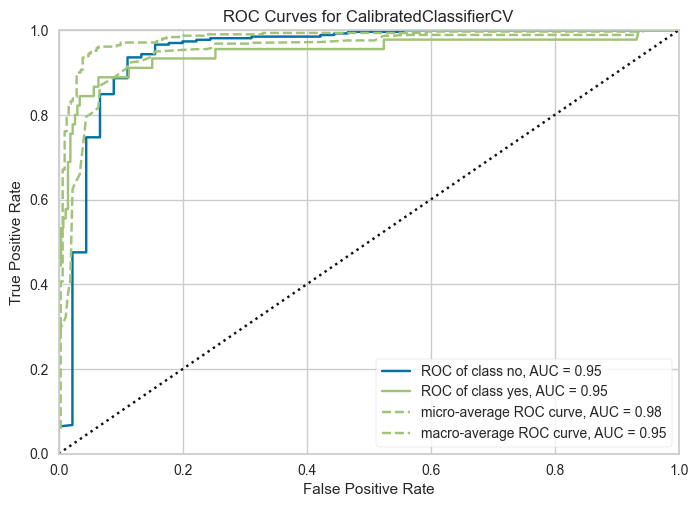

In [17]:
plot_model(final_gbc, plot ="auc")

In [18]:
evaluate_model(final_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
ada_test= create_model("ada",cross_validation= False)
ada_test_results= pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9387,0.9331,0.7333,0.825,0.7765,0.7411,0.7428


In [20]:
ada = create_model("ada",cross_validation= True)
ada_results= pull()
ada_scores =ada_results.loc[["Mean"]] 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9452,0.9699,0.9167,0.7857,0.8462,0.8131,0.8166
1,0.9178,0.9180,0.6667,0.8000,0.7273,0.6794,0.6833
2,0.9726,0.9904,0.9167,0.9167,0.9167,0.9003,0.9003
3,0.9028,0.9001,0.7273,0.6667,0.6957,0.6379,0.6388
4,0.9722,0.9985,0.8182,1.0000,0.9000,0.8841,0.8901
5,0.9028,0.8674,0.5455,0.7500,0.6316,0.5772,0.5869
6,0.9028,0.8584,0.3636,1.0000,0.5333,0.4919,0.5711
7,0.9167,0.9225,0.5455,0.8571,0.6667,0.6217,0.6425
8,0.8750,0.9389,0.7273,0.5714,0.6400,0.5657,0.5717


In [21]:
tuned_ada= tune_model(ada, optimize = "Recall")
tuned_ada_results = pull()
tuned_ada_scores = tuned_ada_results.loc[["Mean"]]



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8219,0.8456,0.5833,0.4667,0.5185,0.4109,0.4148
1,0.7671,0.9454,0.9167,0.4074,0.5641,0.4357,0.5024
2,0.7671,0.9775,1.0000,0.4138,0.5854,0.4597,0.5463
3,0.7222,0.8539,0.8182,0.3333,0.4737,0.3277,0.3887
4,0.9444,0.9799,0.8182,0.8182,0.8182,0.7854,0.7854
5,0.8750,0.9113,0.6364,0.5833,0.6087,0.5345,0.5352
6,0.8194,0.9590,1.0000,0.4583,0.6286,0.5301,0.6005
7,0.8750,0.8793,0.6364,0.5833,0.6087,0.5345,0.5352
8,0.7778,0.8614,0.7273,0.3810,0.5000,0.3746,0.4070


In [22]:
final_ada = calibrate_model(tuned_ada)
final_ada_results= pull()
final_ada_scores = final_ada_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8219,0.8456,0.5833,0.4667,0.5185,0.4109,0.4148
1,0.7671,0.9454,0.9167,0.4074,0.5641,0.4357,0.5024
2,0.7671,0.9775,1.0000,0.4138,0.5854,0.4597,0.5463
3,0.7222,0.8539,0.8182,0.3333,0.4737,0.3277,0.3887
4,0.9444,0.9799,0.8182,0.8182,0.8182,0.7854,0.7854
5,0.8750,0.9113,0.6364,0.5833,0.6087,0.5345,0.5352
6,0.8194,0.9590,1.0000,0.4583,0.6286,0.5301,0.6005
7,0.8750,0.8793,0.6364,0.5833,0.6087,0.5345,0.5352
8,0.7778,0.8614,0.7273,0.3810,0.5000,0.3746,0.4070


In [23]:
predict_model(final_ada)
result_pred_ada = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9129,0.9176,0.7333,0.6875,0.7097,0.6585,0.6590


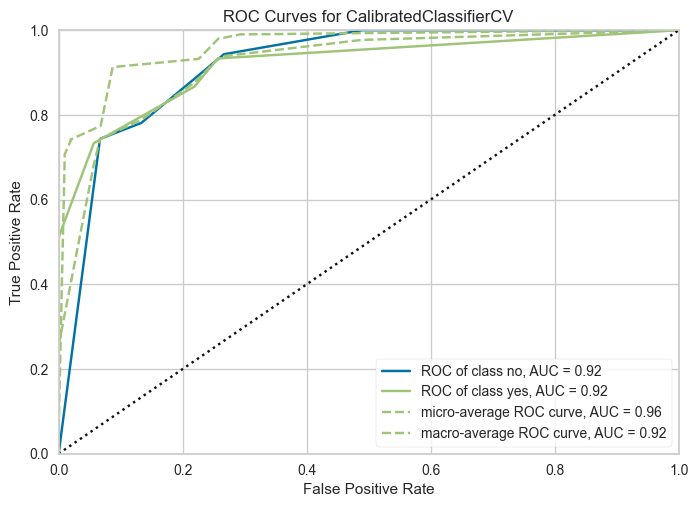

In [24]:
plot_model(final_ada, plot ="auc")

In [25]:
evaluate_model(final_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
# results table

resum= pd.concat([ada_scores, gbc_scores,  rf_scores, ada_test_results,gbc_test_results,rf_test_results], axis =0)
resum.index = ["AdaBoost_1_CV", "Gradient Boosting_1_CV", "Random Forest_1_CV", "AdaBoost_1_Test", "Gradient Boosting_1_Test", "Random Forest_1_Test"]
resum                


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
AdaBoost_1_CV,0.9225,0.9334,0.6864,0.8125,0.7257,0.6823,0.6958
Gradient Boosting_1_CV,0.9212,0.9488,0.7326,0.7698,0.7406,0.6948,0.7013
Random Forest_1_CV,0.9253,0.9453,0.6909,0.8072,0.7411,0.6981,0.7031
AdaBoost_1_Test,0.9387,0.9331,0.7333,0.8250,0.7765,0.7411,0.7428
Gradient Boosting_1_Test,0.9484,0.9574,0.8000,0.8372,0.8182,0.7881,0.7884
Random Forest_1_Test,0.9484,0.9556,0.7556,0.8718,0.8095,0.7798,0.7825


In [37]:
resum_2 = pd.concat([ tuned_ada_scores, tuned_gbc_scores, tuned_rf_scores, final_ada_scores, final_gbc_scores, final_rf_scores,  ], axis=0)                
resum_2.index = ["AdaBoost_1_Tunned", "Gradient Boosting_1_Tunned", "Random Forest_1_Tunned", "AdaBoost_1_Final", "Gradient Boosting_1_Final", "Random Forest_1_Final"]
resum_2

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
AdaBoost_1_Tunned,0.8273,0.9163,0.7955,0.5088,0.6026,0.5055,0.5385
Gradient Boosting_1_Tunned,0.9059,0.9367,0.7765,0.6838,0.7216,0.6659,0.6718
Random Forest_1_Tunned,0.8852,0.9358,0.7780,0.6180,0.6846,0.6168,0.6255
AdaBoost_1_Final,0.8273,0.9163,0.7955,0.5088,0.6026,0.5055,0.5385
Gradient Boosting_1_Final,0.9073,0.9404,0.7856,0.6843,0.7268,0.6718,0.6773
Random Forest_1_Final,0.8852,0.9360,0.7871,0.6176,0.6876,0.6198,0.6294


In [27]:
resup = pd.concat([result_pred_ada, result_pred_gbc, result_pred_rf])
resup

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9129,0.9176,0.7333,0.6875,0.7097,0.6585,0.6590
0,Gradient Boosting Classifier,0.9484,0.9472,0.7778,0.8537,0.8140,0.7841,0.7852
0,Random Forest Classifier,0.9161,0.9509,0.7778,0.6863,0.7292,0.6798,0.6816
